In [93]:
from custom_functions import *
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.integrate import solve_ivp

# Find Eq with b = 0.1, g = 0.3

#### Expanded Dim System

In [94]:
####### Expanded Dimention

def userf1(t, x_arr, p):
    '''2D ODE system for the AMOC
    Input
    t  : float
        time value
    x  : array (2, N)
        state space values
    p  : array (2,)
        parameter values
    
    
    Returns
    xout: array, shape (2, N)
           Array containing derivative at x
           2nd dimension denotes derivatives for different points
    '''
    
    if x_arr.ndim == 1:
        x_arr = np.expand_dims(x_arr, axis=1)
    
    n = x_arr.shape
    xout = np.empty(n)
    xout[:] = np.nan 

    b = p[0,]
    g = p[1,]
    
    
    xout[0,:] = x_arr[0, :] - (x_arr[0, :]**2)*np.exp(-b*x_arr[0, :]*x_arr[1, :])
    xout[1,:] = x_arr[1, :] - (x_arr[1, :]**2)*np.exp(-g*x_arr[0, :])
    return xout

def userdf(x):
    h = 1e-06
    J = MyJacobian(userf, x, h)
    if J.ndim > 2:
        J = J.squeeze(axis=2)
    return J

#### Nonexpanded Dimention

In [131]:
####### Nonexpanded Dimention

def f1(x_arr, b, g):
    #x_arr is an array where x_arr[0] = x and x_arr[1] = z

    dxdt = x_arr[0] - (x_arr[0]**2)*np.exp(-b*x_arr[0]*x_arr[1])
    dzdt = x_arr[1] - (x_arr[1]**2)*np.exp(-g*x_arr[0])

    return np.array([dxdt, dzdt])



def df_for_f1(x):
    h = 1e-06
    J = MyJacobian(function_being_used, x, h)
    J = np.squeeze(J, axis = 2)
    return J
    
def grid_of_coords(max_x_val, increment):
    x=np.linspace(-max_x_val, max_x_val, int(2*max_x_val/increment + 1))
    y=np.linspace(-max_x_val, max_x_val, int(2*max_x_val/increment + 1))

    xx,yy=np.meshgrid(x,y)
    coords=np.array((xx.ravel(), yy.ravel())).T
    return coords

def bin_repeats(points, threshold):

    # Function to calculate the distance between two points
    def distance(point1, point2):
        return np.sqrt(np.sum((point1 - point2) ** 2))

    # Create a mask for points to keep
    keep_mask = np.ones(len(points), dtype=bool)

    # Iterate through the points and filter based on the threshold
    for i in range(len(points)):
        if keep_mask[i]:
            for j in range(i + 1, len(points)):
                if distance(points[i], points[j]) < threshold:
                    keep_mask[j] = False

    # Use the mask to filter the points and create a 2D NumPy array
    return points[keep_mask] 

### Loop through a grip of points and bin the repeated equilibrium points

In [174]:

#comment out to save ti
def function_being_used(x0):
    b = 0.16
    g = 0.3
    return f1(x0, b, g)


x0 = np.array([0, 1.])
tol = 1e-8
maxit = 100

coords = grid_of_coords(10, 0.5)
eqlib_list = np.empty(shape=[0, 2])

for i in coords:
    x , converged , jacobian = MySolve(function_being_used, i, df_for_f1, tol, maxit)
    
    if converged:
        x = np.squeeze(x, axis = 1)
        eqlib_list = np.append(eqlib_list, np.array([x]), axis=0)

print(bin_repeats(eqlib_list, 1e-5))
equlib_list = bin_repeats(eqlib_list, 1e-5)



matrix is singular
matrix is singular
matrix is singular
matrix is singular


C:\Users\aaron\AppData\Local\Temp\ipykernel_36204\2395956410.py:6: RuntimeWarning: overflow encountered in exp
  dxdt = x_arr[0] - (x_arr[0]**2)*np.exp(-b*x_arr[0]*x_arr[1])
c:\Users\aaron\OneDrive\Documents\AAUni\Dynamical systems and chaos\Case Study\custom_functions.py:55: RuntimeWarning: invalid value encountered in subtract
  dfi = (f(xi1) - f(xi2)) / (2 * h)
c:\Users\aaron\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\linalg\linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


matrix is singular
matrix is singular
matrix is singular
matrix is singular


C:\Users\aaron\AppData\Local\Temp\ipykernel_36204\2395956410.py:7: RuntimeWarning: overflow encountered in exp
  dzdt = x_arr[1] - (x_arr[1]**2)*np.exp(-g*x_arr[0])


matrix is singular
matrix is singular
[[ 0.00000000e+00 -1.77620881e-22]
 [ 1.00000000e+00 -1.00792442e-24]
 [-2.45569244e-25  1.00000000e+00]
 [ 1.41220675e+00  1.52754523e+00]
 [ 2.77458058e+00  2.29876995e+00]]


## Determine stability
For b = 0.1 and g = 0.3 the equilibrium points are $x_{l1} = [ 1.184, 1.426]$ and $x_{l2} = [ 4.116, 3.438]$

In [175]:
J = df_for_f1(equlib_list[3])
eig_val2 = linalg.eig(J)[0]
print(equlib_list[3])
print(eig_val1)

J = df_for_f1(equlib_list[4])
eig_val2 = linalg.eig(J)[0]
print(equlib_list[4])
print(eig_val2)

[1.41220675 1.52754523]
[-0.55184064+0.j -1.07928453+0.j]
[2.77458058 2.29876995]
[ 0.56371663+0.j -1.54321703+0.j]


In [148]:
h = 1e-6
p = np.array([0.1, 0.3])
print('For b = 0.1, g = 0.3')
J = MyJacobian(lambda x:userf1(0,x,p),   equlib_list[3],   h).squeeze(axis = 2)
print('Should be stable node at [1.184, 1.426], Eigen Values:', eig_val1)
eig_val1 = linalg.eig(J)[0]
J = MyJacobian(lambda x:userf1(0,x,p),equlib_list[4],h).squeeze(axis = 2)
eig_val2 = linalg.eig(J)[0]
print('Should be saddle node at [4.116, 3.438], Eigen Values:', eig_val2)

For b = 0.1, g = 0.3
Should be stable node at [1.184, 1.426], Eigen Values: [-0.97915767+0.j -1.0194901 +0.j]


IndexError: index 4 is out of bounds for axis 0 with size 4

### IVP tracking with MyIVP this doesn't work idfk why

[1.00135315 1.35040689]


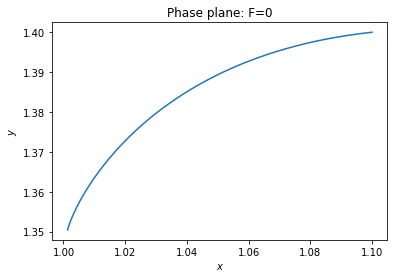

In [149]:
# Define parameters p
b = 0.001; g = 0.3; p = np.array([b, g])
#b = 1; g = -1; p = np.array([b, g])

#define variable to go into MyIVP
x0 = np.array([ 1.1, 1.4])
#x0 = np.array([1.5,0.2])
tspan = [0,100]
h = 0.001

#call MyIVP
[X,t,xeq1] = MyIVP(lambda t,x:userf1(t,x,p),x0,tspan,h)
X = np.squeeze(X)
xeq1 = np.squeeze(xeq1)
print(xeq1)

#Plot
plt.plot(X[0,:],X[1,:])
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.title("Phase plane: F=0")

plt.show()

### IVP tracking with SciPy

[1.18399237 1.42646265]


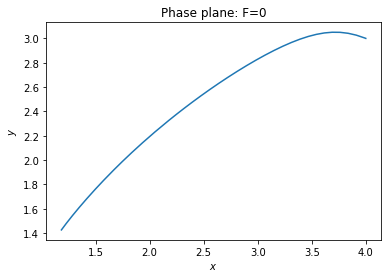

In [11]:
def func_for_scipy_ivp(t, x_arr, b, g):
    #g is included in x_arr
    #x_arr is an array where x_arr[0] = x and x_arr[1] = z, x_arr[2] = g
    #b = p[0]
    #g = p[1]

    dxdt = x_arr[0] - (x_arr[0]**2)*np.exp(-b*x_arr[0]*x_arr[1])
    dzdt = x_arr[1] - (x_arr[1]**2)*np.exp(-g*x_arr[0])

    return np.array([dxdt, dzdt])


#Using scipy solver test
tspan = [0,100]
b = 0.1
g = 0.3
p = np.array([b, g])
x0 = np.array([4, 3])
sol = solve_ivp(func_for_scipy_ivp,tspan, x0, args= (p), first_step = 1e-6, max_step = 1e-1)

#t = np.linspace(0, 100, 1000)
#points = sol.sol(t)


#print(sol)
number_of_points = sol.y[0].shape[0]
final_point = np.array([sol.y[0, number_of_points - 1], sol.y[1, number_of_points - 1]])

print(final_point)

plt.plot(sol.y[0], sol.y[1])
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.title("Phase plane: F=0")

plt.show()

# Quiver

In [12]:
#Function for quiver

def function_for_quiver(x_arr, t):
    #x_arr is an array where x_arr[0] = x and x_arr[1] = z
    b = 0.1
    g = 0.3
    dxdt = x_arr[0] - (x_arr[0]**2)*np.exp(-b*x_arr[0]*x_arr[1])
    dzdt = x_arr[1] - (x_arr[1]**2)*np.exp(-g*x_arr[0])

    return np.array([dxdt, dzdt])


#Create a grid of x and y values
x = np.linspace(-4, 4, 40) + 3
y = np.linspace(-4, 4, 40) + 3
X, Y = np.meshgrid(x, y)

# Initialize arrays to store the direction vectors
U = np.zeros_like(X)
V = np.zeros_like(Y)

# Compute the direction vectors at each grid point
for i in range(len(x)):
    for j in range(len(y)):
        initial_conditions = [X[i, j], Y[i, j]]
        t = np.linspace(0, 1, 10)  # Time points for integration
        result = odeint(function_for_quiver, initial_conditions, t)
        dx = result[-1, 0] - X[i, j]
        dy = result[-1, 1] - Y[i, j]
        magnitude = np.sqrt(dx**2 + dy**2)
        if magnitude != 0:
            U[i, j] = dx / (2*magnitude)
            V[i, j] = dy / (2*magnitude)

c:\Users\aaron\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\integrate\_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
C:\Users\aaron\AppData\Local\Temp\ipykernel_36204\1429745269.py:30: RuntimeWarning: overflow encountered in double_scalars
  magnitude = np.sqrt(dx**2 + dy**2)


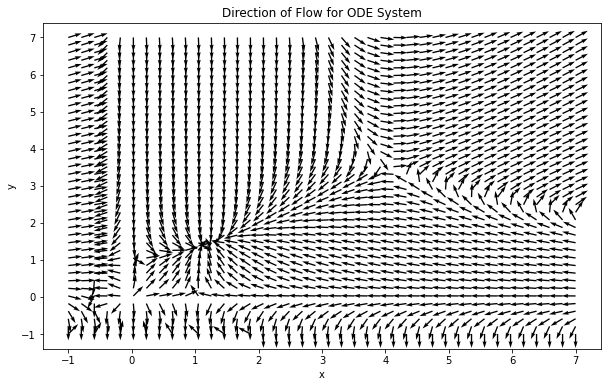

In [13]:
plt.figure(figsize=(10,6))
plt.quiver(X, Y, U, V, scale=20)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Direction of Flow for ODE System')
plt.show()

### We can quite obviously see a stable node at $x_{l1} = [ 1.184, 1.426]$ and a saddle node at $x_{l2} = [ 4.116, 3.438]$

# Burfication Tracking

In [176]:
# Define RHS for tracking equilibria
RHS = lambda y: userf1(0,y[0:2,:],np.array([y[2,:], g]))

h=1e-6
df= lambda y: np.squeeze(MyJacobian(RHS,y,h),axis=2)

# Define MyTrackCurve initial points, MAKE GUESS OF Y TANGENT
xeq1 = equlib_list[3]
y0 = np.append(xeq1,np.array([b]),axis=0)
print(y0)
ytan0 = np.expand_dims(np.array([0.,1.,1.]),axis=1) # guess in the direction of increasing F

# Solve for the true initial tangent
df0 = df(y0)
zeros0 = np.zeros((2,))
zeros1 = np.append(zeros0,np.array([1.]),axis=0)
f0 = np.concatenate((df0,np.transpose(ytan0)),axis=0)
z = np.linalg.lstsq(f0,zeros1,rcond=None)[0]
mult = np.sign(np.matmul(np.transpose(z),ytan0))
ytan = np.divide(z,linalg.norm(z))*mult

print(ytan)

ylist1 = MyTrackCurve(RHS,df,y0,ytan,nmax=1000,stepsize=0.01)


#NOW OTHER DIRECTION
# guess in direction for decreasing F
ytan0 = np.expand_dims(np.array([0.,0.,-1.]),axis=1)

# Solve for the true initial tangent
f0 = np.concatenate((df0,np.transpose(ytan0)),axis=0)
z = np.linalg.lstsq(f0,zeros1,rcond=None)[0]
mult = np.sign(np.matmul(np.transpose(z),ytan0))
ytan = np.divide(z,linalg.norm(z))*mult

ylist2 = MyTrackCurve(RHS,df,y0,ytan,nmax=1000,stepsize=0.01)

###Concatenate
#ylist = np.concatenate((np.flip(ylist2,1),ylist1),axis=1)
ylist = ylist1.copy()

[1.41220675e+00 1.52754523e+00 1.00000000e-03]
[0.8486287  0.38889562 0.35859383]


C:\Users\aaron\AppData\Local\Temp\ipykernel_36204\4272724160.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  RHS = lambda y: userf1(0,y[0:2,:],np.array([y[2,:], g]))


## Plotting

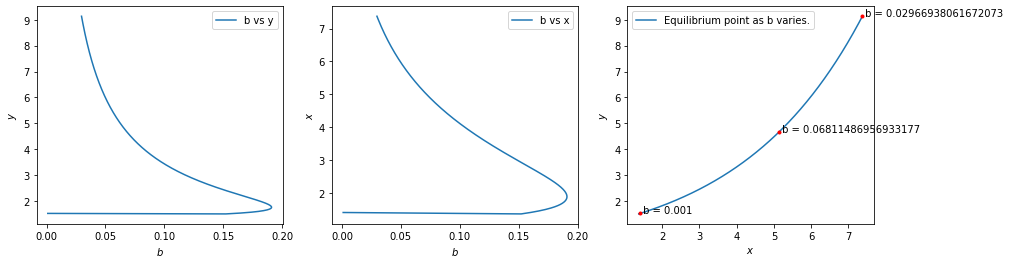

In [177]:
fig, axs = plt.subplots(1, 3, figsize=(15, 4))

ax1 = axs[0]
ax1.plot(ylist[2,:],ylist[1,:], label = 'b vs y')
ax1.set_xlabel("$b$")
ax1.set_ylabel("$y$")
ax1.legend()
ax1.set_title("")

ax2 = axs[1]
ax2.plot(ylist[2,:], ylist[0,:], label = 'b vs x')
ax2.set_xlabel("$b$")
ax2.set_ylabel("$x$")
ax2.legend()
ax2.set_title("")

ax3 = axs[2]
length = ylist.shape[1] # The number of points in ylist
ax3.plot(ylist[0,:], ylist[1,:], label = 'Equilibrium point as b varies.')
label = ' b = ' + str(ylist[2,0])
ax3.plot(ylist[0,0], ylist[1,0], '.', color = 'r')
ax3.text(ylist[0,0], ylist[1,0],label)

label = ' b = ' + str(ylist[2,int(length/2)])
ax3.plot(ylist[0,int(length/2)], ylist[1,int(length/2)], '.', color = 'r' )
ax3.text(ylist[0,int(length/2)], ylist[1,int(length/2)],label)

label = ' b = ' + str(ylist[2,length-1])
ax3.plot(ylist[0,int(length-1)], ylist[1,int(length-1)], '.', color = 'r' )
ax3.text(ylist[0,int(length-1)], ylist[1,int(length-1)],label)




ax3.set_xlabel("$x$")
ax3.set_ylabel("$y$")
ax3.legend()
ax3.set_title("")

#ax4 = axs[1, 1]

plt.show()

## Finding stabilities

In [178]:
#Finding the eigen values (eig_val), and stability (stab) at at value of g
stab = np.empty((ylist.shape[1],1))*np.nan
#note that the number of eigen values at each point of g will be ylist's (=[x,z,g])  width-1
eig_val = np.empty((ylist.shape[1],ylist.shape[0]-1),dtype=np.csingle)

#print('should be same',ylist1[0:2,0], xeq1)

#J = MyJacobian(lambda x:userf1(0,x,p_i),ylist[0:2,i],h)
#eig_val[i,:] = linalg.eig(J[:,:,0])[0]

for i in np.arange(0,ylist.shape[1]):
    p_i =np.array([ylist[2,i],g])
    J = MyJacobian(lambda x:userf1(0,x,p_i),ylist[0:2,i],h)
    eig_val[i,:] = linalg.eig(J[:,:,0])[0]
    max_eig = max(np.real(eig_val[i,:]))
    stab[i] = max_eig > 0
    if (i>0 and stab[i] != stab[i-1] and stab[i-1] != 10):
        #print(max_eig)
        stab[i] = 10


In [179]:
for i in eig_val:
    print(i)

[-1.8168639+0.j -0.9984234+0.j]
[-0.45086494+0.j -1.2349776 +0.j]
[-0.44179907+0.j -1.2375127 +0.j]
[-0.4327933+0.j -1.2400266+0.j]
[-0.42384663+0.j -1.2425201 +0.j]
[-0.4149582+0.j -1.2449939+0.j]
[-0.40612713+0.j -1.2474489 +0.j]
[-0.39735255+0.j -1.2498858 +0.j]
[-0.38863367+0.j -1.2523053 +0.j]
[-0.37996966+0.j -1.2547078 +0.j]
[-0.3713597+0.j -1.2570941+0.j]
[-0.3628031+0.j -1.2594649+0.j]
[-0.3542991+0.j -1.2618203+0.j]
[-0.34584695+0.j -1.2641611 +0.j]
[-0.33744594+0.j -1.2664877 +0.j]
[-0.32909542+0.j -1.2688006 +0.j]
[-0.3207947+0.j -1.2711003+0.j]
[-0.3125431+0.j -1.273387 +0.j]
[-0.30433998+0.j -1.2756611 +0.j]
[-0.2961847+0.j -1.2779232+0.j]
[-0.28807667+0.j -1.2801734 +0.j]
[-0.28001523+0.j -1.2824122 +0.j]
[-0.27199984+0.j -1.2846398 +0.j]
[-0.2640299+0.j -1.2868565+0.j]
[-0.2561048+0.j -1.2890627+0.j]
[-0.24822402+0.j -1.2912587 +0.j]
[-0.240387 +0.j -1.2934446+0.j]
[-0.23259316+0.j -1.2956207 +0.j]
[-0.22484203+0.j -1.2977873 +0.j]
[-0.21713303+0.j -1.2999446 +0.j]
[-0.

## Plot stabilities

In [161]:
print(ylist[2,885])
print(ylist[2,1000])
print(ylist[2,1005])

-1.003750221366498
0.001
0.022705037366735407


Note beofre
-0.9352748918286293
-0.4293920833150621
0.17373523846832375

i:  60
1.8969735822859262 1.766662325611267 0.19104750932244213
[[-1.8168639 +0.j -0.9984234 +0.j]
 [-0.45086494+0.j -1.2349776 +0.j]
 [-0.44179907+0.j -1.2375127 +0.j]
 ...
 [ 2.324305  +0.j -2.3274212 +0.j]
 [ 2.3253014 +0.j -2.327952  +0.j]
 [ 2.3262968 +0.j -2.3284817 +0.j]]


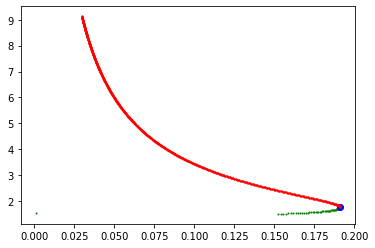

In [180]:
#b vs y stabilities

for i in np.arange(0,ylist.shape[1]):
    if stab[i] == False:
        plt.plot(ylist[2,i],ylist[1,i],'g.',markersize=2,label = 'stable eq')
    elif stab[i] == True:
        plt.plot(ylist[2,i],ylist[1,i],'r.',markersize=2,label = 'unstable eq')
    elif stab[i] == 10:
        plt.plot(ylist[2,i],ylist[1,i],marker='o',color='b',markersize=6,label='SN')
        print('i: ', i)
        print(ylist[0,i],ylist[1,i], ylist[2,i])
        #print(eig_val[i])
        
    else:
        print('Error - undefined stability type')


#plt.plot(ylist[2,861], ylist[1,861], 'o', color = 'r' )
#plt.plot(ylist[2,977], ylist[1,977], 'o', color = 'r' )

#print('b for first two green points. ', ylist[2,861], ylist[2,977])

print(eig_val)

### Further analysis of eigan values (Working out if, node/staddle stable/unstable)
The 6 types are:

1: stable node

2: unstable node

3: Saddle

4: stable focus

5: unstable focus

6: center 



In [163]:
equlib_type = np.empty((eig_val.shape[0],1))*np.nan

for i in range(eig_val.shape[0]):
    if np.imag(eig_val[i,0]) == 0:
            #Stable Node
            if eig_val[i,0] <= 0 and eig_val[i,0] <= 0:
                equlib_type[i] = 1
            #Unstable Node
            elif eig_val[i,0] >= 0 and eig_val[i,0] >= 0:
                equlib_type[i] = 2
            #Saddle
            else:
                equlib_type[i] = 3
    else:
        #Center
        if np.real(eig_val[i,0]) == 0:
            equlib_type[i] = 6
        #stable focus
        elif np.real(eig_val[i,0]) <= 0:
            equlib_type[i] = 4
        else:
            equlib_type[i] = 5
   

In [172]:
for i in equlib_type:
    print(i)

[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]


0.1623600456875152


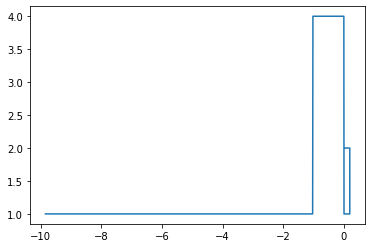

In [173]:
plt.plot(ylist[2, :], equlib_type )
print(ylist[2, 1200])

# 2 Parameter Track (in b and g)
The change in stability found above was likely a hopf Bif

In [19]:
#Define functions
def df_2param(y):
    J = MyJacobian(lambda x:userf1(0,x,np.array([y[2],y[3]])),y[0:2],h)
    J = np.squeeze(J,axis=2)
    return J

######### Fold Bif ############
######### Note that the y[2,:] y[3,:] must be the right way around in the RHS functions
######### it depends on how you've defined your y0 when doing the tack curve
RHS_fold = lambda y: np.append(userf1(0,y[0:2,:],np.array([y[2,:],y[3,:]])),
                               np.expand_dims(np.array([linalg.det(df_2param(y))]),axis=1),axis=0)

df_fold= lambda y: np.squeeze(MyJacobian(RHS_fold,y,h),axis=2)

######### Hopf Bif ############

RHS_hopf = lambda y: np.append(userf1(0,y[0:2,:],np.array([y[2,:],y[3,:]])),
                               np.expand_dims(np.array([np.trace(df_2param(y))]),axis=1),axis=0)

df_hopf= lambda y: np.squeeze(MyJacobian(RHS_hopf,y,h),axis=2)

## Track Curve

In [76]:
#RHS_used and df_used is either RHS_fold or RHS_hopf
RHS_used = RHS_fold
df_used = df_fold


# Define MyTrackCurve initial points
############ Note: make sure the var ylist has not been changed since the burfication tacking cell 
which_bif_pnt = 0
#b = 0.1
f_inds = np.where(stab == 10)[0]
y0 = np.array([ylist[0,f_inds[which_bif_pnt]], ylist[1,f_inds[which_bif_pnt]], ylist[2,f_inds[which_bif_pnt]],g])
print('y0', y0)

p_i =np.array([ylist[2,f_inds[which_bif_pnt]],g])
J = MyJacobian(lambda x:userf1(0,x,p_i),ylist[0:2,f_inds[which_bif_pnt]],h)
eig_val = linalg.eig(J[:,:,0])[0]


ytan0 = np.expand_dims(np.array([0,0,1,1]),axis=1) # guess i the direction of increasing params

# Solve for the true initial tangent
df0 = np.squeeze(df_used(y0))
zeros0 = np.zeros((3,))
zeros1 = np.append(zeros0,np.array([1.]),axis=0)
f0 = np.concatenate((df0,np.transpose(ytan0)),axis=0)
z = np.linalg.lstsq(f0,zeros1,rcond=None)[0]
mult = np.sign(np.matmul(np.transpose(z),ytan0))
ytan = np.divide(z,linalg.norm(z))*mult
print('ytan', ytan)

yused1 = MyTrackCurve(RHS_used,df_used,y0,ytan,stepsize=0.1,nmax=200)

# guess in direction for decreasing params
ytan0 = np.expand_dims(np.array([0,0,-1,-1]),axis=1)

# Solve for the true initial tangent
f0 = np.concatenate((df0,np.transpose(ytan0)),axis=0)
z = np.linalg.lstsq(f0,zeros1,rcond=None)[0]
mult = np.sign(np.matmul(np.transpose(z),ytan0))
ytan = np.divide(z,linalg.norm(z))*mult

yused2 = MyTrackCurve(RHS_used,df_used,y0,ytan,stepsize=0.1,nmax=5000)

y0 [1.89777181 1.76708544 0.19104688 0.3       ]
ytan [-0.37796404  0.86232211 -0.11456877  0.31688762]


In [90]:
for i in yused[2,:]:
    print(i)

0.028695379001777356
0.028700033909218076
0.028704691568363878
0.0287093504023594
0.028714010033138074
0.02871867258366586
0.028723334082377837
0.028728000453903266
0.028732667570205168
0.02873733483847191
0.028742004478232837
0.02874667588783887
0.028751348947176437
0.028756023428047364
0.028760701837218582
0.028765378434951513
0.028770057240826517
0.02877473983834506
0.02877942150473928
0.028784105689676823
0.02878879455922039
0.02879348343228317
0.02879817206281863
0.028802862749199614
0.028807553872451746
0.02881225083420726
0.02881694834436371
0.028821644295419297
0.02882634595971794
0.028831045664784654
0.028835748069895216
0.02884045348682196
0.028845159685828226
0.02884986947345421
0.028854577983059435
0.02885928869802675
0.02886400297104593
0.02886871520680382
0.02887343270632109
0.02887815284073074
0.028882872091974494
0.028887591707652604
0.028892317718783096
0.0288970421461897
0.028901768280413874
0.028906496411381297
0.028911227495002117
0.02891595766266018
0.0289206891298

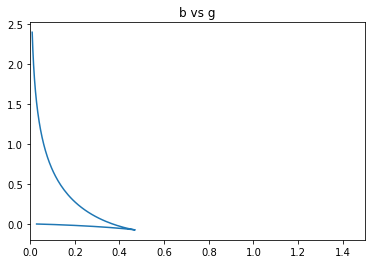

In [77]:
yused = np.concatenate((np.flip(yused2,1),yused1),axis=1)

plt.plot(yused[2,:],yused[3,:])
plt.xlim(0, 1.5)
plt.title("b vs g")
plt.show()

### Storing the var

In [79]:
TwoD_Fold_Track = yused
#%store TwoD_Fold_Track

Stored 'TwoD_Fold_Track' (ndarray)
